In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn import svm

data = pd.read_csv("/Users/hendershot/Desktop/data science + machine learning/datasets/NearEarthObjects.csv")

In [2]:
# data sample

data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [90]:
# data tail

data.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [3]:
# amount of data

data.shape

(90836, 10)

In [4]:
# describing data

data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [5]:
# checking for missing values 

data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
# converting all non-numeric data to numeric - using one hot encoding

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder
le = LabelEncoder()

for val in data:
    # compare if the dtype is object
    if data[val].dtypes=='object':
        data[val]=le.fit_transform(data[val])

In [7]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,24991,1.198271,2.679415,13569.249224,5.483974e+07,0,False,16.73,False
1,2277475,25414,0.265800,0.594347,73588.726663,6.143813e+07,0,False,20.00,True
2,2512244,26799,0.722030,1.614507,114258.692129,4.979872e+07,0,False,17.83,False
3,3596030,5505,0.096506,0.215794,24764.303138,2.543497e+07,0,False,22.20,False
4,3667127,7518,0.255009,0.570217,42737.733765,4.627557e+07,0,False,20.09,True


/var/folders/k_/h372tzbs1kndwxscp79k019m0000gn/T/ipykernel_34636/403916990.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


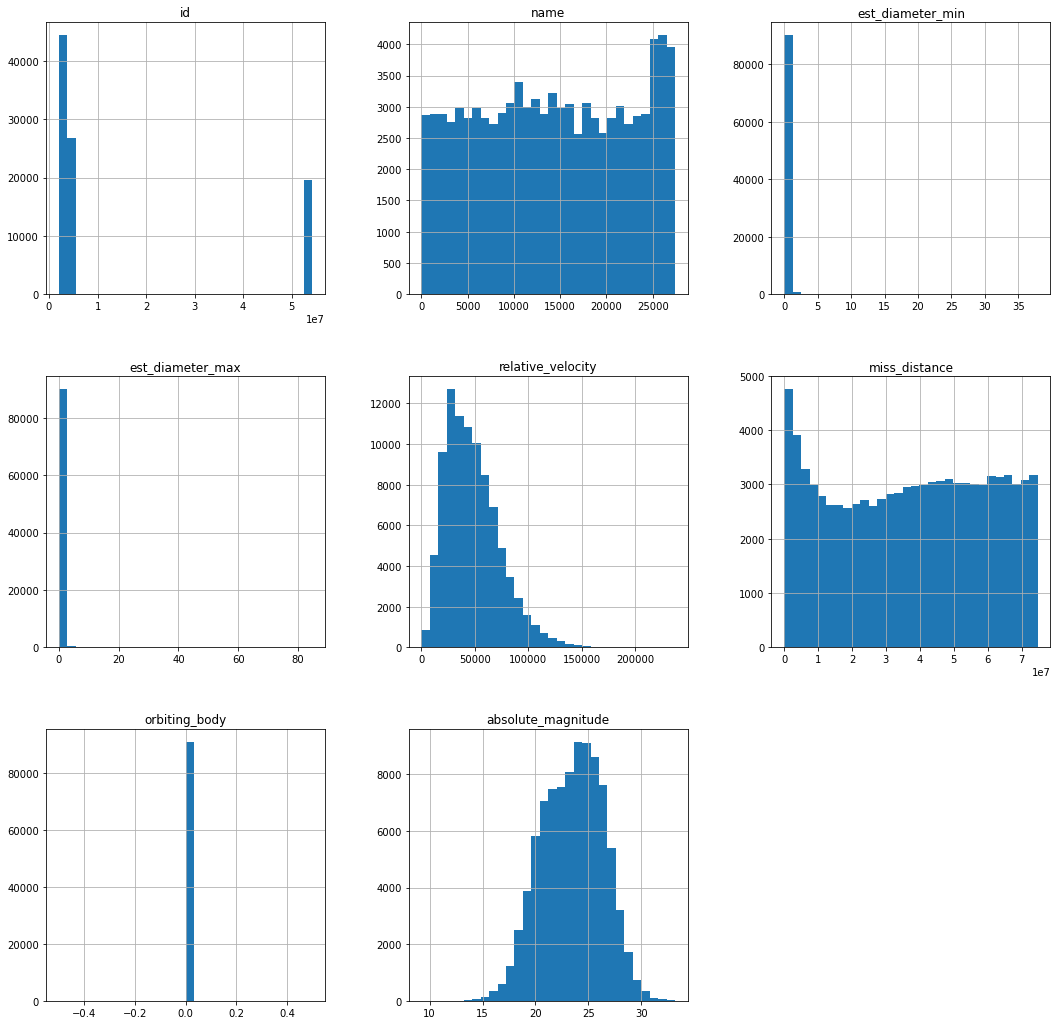

In [8]:
# histograms for all data excpet sentry_object and hazardous 

fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

In [9]:
# creating copy of numerical data

data1 = data.copy()

In [10]:
data1.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,11596,0.026580,0.059435,52078.886692,1.230039e+07,0,False,25.00,False
90832,3837603,15564,0.016771,0.037501,46114.605073,5.432121e+07,0,False,26.00,False
90833,54017201,18912,0.031956,0.071456,7566.807732,2.840077e+07,0,False,24.60,False
90834,54115824,21123,0.007321,0.016370,69199.154484,6.869206e+07,0,False,27.80,False
90835,54205447,23074,0.039862,0.089133,27024.455553,5.977213e+07,0,False,24.12,False


In [11]:
# converting boolean to bianary for sentry_object

data1.loc[:, 'sentry_object'] = data1.loc[:, 'sentry_object'].apply(lambda x: 1 if x == True else 0)

In [12]:
# converting boolean to bianary for sentry_object

data1.loc[:, 'hazardous'] = data1.loc[:, 'hazardous'].apply(lambda x: 1 if x == True else 0)

In [13]:
data1.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,24991,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,2277475,25414,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,2512244,26799,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,3596030,5505,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,3667127,7518,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1


In [14]:
# feature importance https://predictivehacks.com/feature-importance-in-python/
# did not consider name

model = RandomForestClassifier()

features = data1[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude']]
 
model.fit(features, data1['hazardous'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
3,miss_distance,0.302801
2,relative_velocity,0.268770
6,absolute_magnitude,0.163592
1,est_diameter_max,0.137781
0,est_diameter_min,0.127057
4,orbiting_body,0.000000
5,sentry_object,0.000000


In [15]:
# train test 

import statsmodels.api as sm

spacetrain, spacetest = train_test_split(data1, train_size=0.70, random_state=1)

# train: independent and dependent variables
xtrain = spacetrain[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude']]
ytrain = spacetrain[['hazardous']]

# test: independent and dependent variables 
xtest = spacetest[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude']]
ytest = spacetest[['hazardous']]

# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledxtrain = scaler.fit_transform(xtrain)
rescaledxtest = scaler.fit_transform(xtest)

In [16]:
# building model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# fit model
logreg.fit(rescaledxtrain, ytrain)

from sklearn.metrics import (confusion_matrix, accuracy_score)
ypred = logreg.predict(rescaledxtest)
prediction = list(map(round, ypred))

print (ypred)

#confusion matrix
cm = confusion_matrix(ytest, prediction)
print ("Confusion Matrix: \n", cm)

#accuracy score of model
print('Test accuracy = ', accuracy_score(ytest, prediction))

[0 0 0 ... 0 0 0]
Confusion Matrix: 
 [[24375   240]
 [ 2512   124]]
Test accuracy =  0.8990128802612748


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# support vector machine (svm) https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(rescaledxtrain, ytrain)
prediction2 = clf.predict(rescaledxtest)

from sklearn import metrics

# confussion matrix
cm2 = confusion_matrix(ytest, prediction2)
print ("Confusion Matrix: \n", cm2)

# accuracy
print("Test Accuracy = ", metrics.accuracy_score(ytest, prediction2))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[24615     0]
 [ 2636     0]]
Test Accuracy =  0.9032696047851455


In [19]:
# random forest https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

clf2 = RandomForestClassifier(n_estimators = 100)

clf2.fit(rescaledxtrain, ytrain)

prediction3 = clf2.predict(rescaledxtest)

from sklearn import metrics

# confussion matrix
cm3 = confusion_matrix(ytest, prediction3)
print ("Confusion Matrix: \n", cm3)

# accuracy
print("Test Accuracy = ", metrics.accuracy_score(ytest, prediction3))

/var/folders/k_/h372tzbs1kndwxscp79k019m0000gn/T/ipykernel_34636/609493689.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(rescaledxtrain, ytrain)



Confusion Matrix: 
 [[23748   867]
 [ 2105   531]]
Test Accuracy =  0.8909397820263476
